In [2]:
import pandas as pd
import requests
import bs4

In [3]:
data = pd.read_csv('../04.10.23/habr.csv')
row1 = data.iloc[0]
row1

source                                                  Habr
title      Пишем TIP-4 NFT коллекцию с картами для Гвинта...
link                    https://habr.com/ru/articles/765608/
authors                                         broxus      
Name: 0, dtype: object

In [4]:
article = requests.get(row1.link)
article.text

'<!DOCTYPE html>\n<html lang="ru" data-vue-meta="%7B%22lang%22:%7B%22ssr%22:%22ru%22%7D%7D">\n<head >\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width,initial-scale=1.0,viewport-fit=cover,maximum-scale=1,user-scalable=0">\n  <meta name="referrer" content="unsafe-url">\n  <title>Пишем TIP-4 NFT коллекцию с картами для Гвинта на Everscale за 30 минут / Хабр</title>\n  <style>\n    /* cyrillic-ext */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNxMZdWfMOD5VnZKveSxf6TF0.woff2) format(\'woff2\');\n      unicode-range: U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;\n    }\n\n    /* cyrillic */\n    @font-face {\n      font-family: \'Fira Sans\';\n      font-style: normal;\n      font-weight: 500;\n      font-display: swap;\n      src: url(https://fonts.gstatic.com/s/firasans/v11/va9B4kDNx

In [5]:
soup = bs4.BeautifulSoup(article.text, features="lxml")
text_content = soup.select('#post-content-body > div > *:not(.pre)')[0].getText()

In [6]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

doc = Doc(text_content)

In [7]:
doc.segment(segmenter)

doc.tag_morph(morph_tagger)

for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [8]:
final_text = []

skip_pos = ['PUNCT', 'ADP', 'CCONJ', 'PART', 'NUM', 'AUX', 'DET', 'INTJ', 'PRON', 'SCONJ', 'SYM', 'VERB']

for token in doc.tokens:
    if token.pos in skip_pos:
        continue

    final_text.append(token.lemma)

(-0.5, 1279.5, 799.5, -0.5)

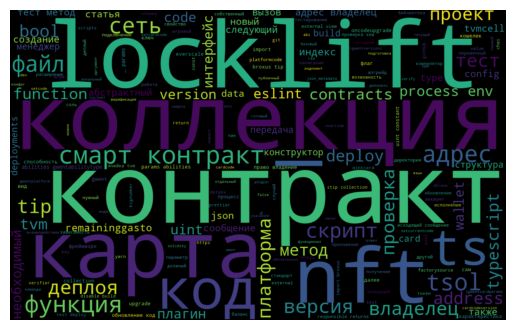

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1280, height=800).generate(' '.join(final_text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")